In [1]:
from osgeo import gdal
from osgeo import ogr
from matplotlib import pyplot
import json
import rasterio
import Rasterize
import os
from matplotlib import pyplot

In [2]:
image_prefix = 'SN3_roads_train_AOI_2_Vegas_PS-MS_'
geo_prefix = 'SN3_roads_train_AOI_2_Vegas_geojson_roads_'

pathRoad = '../SN3_roads_train_AOI_2_Vegas/AOI_2_Vegas/geojson_roads/'
pathImage = '../SN3_roads_train_AOI_2_Vegas/AOI_2_Vegas/PS-MS/'

In [4]:
# ./SN3_roads_train_AOI_2_Vegas/AOI_2_Vegas/geojson_roads/
os.chdir('./SN3_roads_train_AOI_2_Vegas/AOI_2_Vegas/geojson_roads')
geo_files = os.listdir()
filenames = []
for file in geo_files:
    file_name = file.split(geo_prefix)
    filenames.append(file_name[1].split(".")[0])

print(filenames)

['img676', 'img363', 'img448', 'img362', 'img1557', 'img279', 'img900', 'img1322', 'img927', 'img463', 'img1260', 'img848', 'img208', 'img867', 'img628', 'img173', 'img725', 'img1002', 'img106', 'img674', 'img1419', 'img497', 'img289', 'img1331', 'img1058', 'img1401', 'img72', 'img1042', 'img616', 'img312', 'img1082', 'img1469', 'img480', 'img1001', 'img855', 'img486', 'img465', 'img266', 'img1584', 'img213', 'img1335', 'img1036', 'img1379', 'img1051', 'img1015', 'img517', 'img776', 'img387', 'img1443', 'img1615', 'img1155', 'img109', 'img501', 'img1449', 'img470', 'img967', 'img853', 'img714', 'img406', 'img709', 'img1295', 'img641', 'img537', 'img820', 'img360', 'img846', 'img865', 'img955', 'img1527', 'img1090', 'img1300', 'img1549', 'img596', 'img2', 'img1432', 'img704', 'img38', 'img670', 'img398', 'img481', 'img166', 'img928', 'img1589', 'img659', 'img669', 'img76', 'img1386', 'img1494', 'img527', 'img201', 'img625', 'img765', 'img66', 'img1413', 'img271', 'img223', 'img1637', 'i

In [7]:
os.chdir('../../..')
print(os.getcwd())

/home/mohit/Documents/Scripts/notebooks/Geo/RoadDetection


In [8]:
err_files = []
for file in filenames:
    image = pathImage + image_prefix + file + '.tif'
    geojson = pathRoad + geo_prefix + file + '.geojson'

    try:
        os.chdir('./road_masks')
        Rasterize.create_road_mask(rasterSrc=image,vectorSrc=geojson,npDistFileName=file+'.tif')
        os.chdir('..')
    except Exception as e:
        print(e)
        err_files.append(file)
        continue

len(err_files)

0

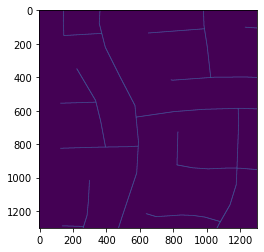

In [21]:
# os.chdir('../')
img = rasterio.open('./road_masks/img4.tif')
pyplot.imshow(img.read(1))

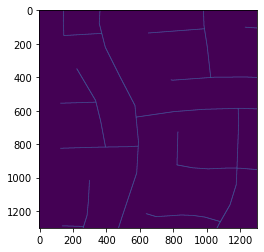

In [2]:
res = rasterio.open('result.tif')
pyplot.imshow(res.read()[0])